<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [33]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    result=face.copy()
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")
    # object az sorat ha ro dade
    rects = detector(result, 1)
    # rect ghabel peymayesh nabode aval enumerate kardim va bade har face ra noghat key ro peyda kardim chon np.array nabod az tabe balla an ha ra tabdil kardim
    for (i, rect) in enumerate(rects):
      # determine the facial landmarks for the face region, then
      # convert the facial landmark (x, y)-coordinates to a NumPy
      # array
      shape = predictor(result, rect)
      shape = shape_to_np(shape)
    # for (x, y) in shape:
    #   cv2.circle(result, (x, y), 1, (0, 0, 255), 2)
    src= np.float32([[611,105], [1164,270],[617,665],[45,240]])
    dest=np.float32([shape[29], shape[14], shape[8],shape[2]])
    M = cv2.getPerspectiveTransform(src, dest)
    result = cv2.warpPerspective(mask, M, (result.shape[1], result.shape[0]))
    result= cv2.bitwise_or(face,result)
    #############
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

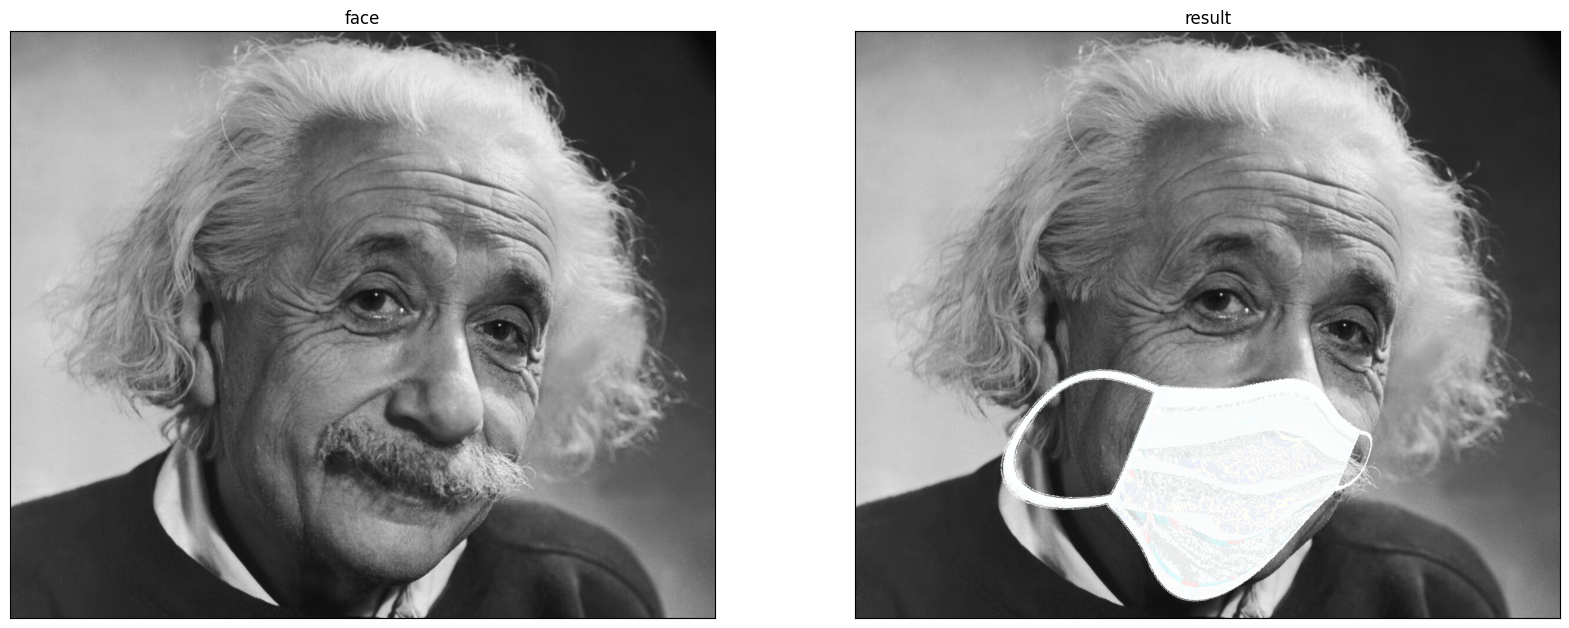

In [34]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('/', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('/', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')